# Presentación de resultados

En este notebook voy a recolectar los resultados de salida de la simulación y plotearlos de diferentes maneras. La idea de sacarlos del entorno gráfico de xschem es tener las ventajas de graficar con python. 

In [1]:
### Seccion de imports

import matplotlib.pyplot as plt
import numpy as np

### Función para extraer los resultados de un archivo .raw

Para importar los resultados de simulación, exporto desde xschem (que utiliza ngspice) los resultados de simulación en un archivo .raw. Luego, voy a importar esos resultados desde este script con la función que se va a definir abajo. Es importante que el archivo .raw en el que se exportan los resultados, los tenga en formato ascii.

In [2]:
def readRaw(rawfile: str, variables: list[str]) -> dict[str,list[float]]:
    """Lee un archivo raw y devuelve las variables indicadas en un
    diccionario. Las llaves son el nombre de las variables en
    la simulacion, y los valores son listas que contienen el resultado
    de simulacion de su respectiva variable.
    """
    out_dict = {}
    aux_dict = {}
    head = None

    with open(rawfile, 'r') as f:
        for line in f:
            linea = line.strip()
            #Flag para identificar la cabecera con las variables
            if(linea == 'Variables:'):
                head = True
            elif(linea == 'Values:'):
                head = False
            
            #Procesamiento de la cabecera y los datos
            if(head == True and linea != 'Variables:'):
                lin_split = linea.split()
                if lin_split[1] in variables:
                    aux_dict[int(lin_split[0])] = lin_split[1]
                    out_dict[lin_split[1]] = []

            elif(head == False and linea != 'Values:'):
                if(len(linea.split()) > 1):  #Nuevo instante de simulacion
                    offset = 0
                if offset in aux_dict:
                    label = aux_dict[offset]
                    out_dict[label].append(float(linea))
                offset = offset + 1
    
    return out_dict

## Simulaciones de transient analysis

Las simulaciones de transient analysis tienen en cuenta las capacitancias parásitas de los modelos de los transistores; por lo tanto, las salidas que se ven consideran los transitorios causados por estas capacitancias. 

In [3]:
# Lectura de archivo

SIM_TIME = 752.8e-12
SIM_STEP = 0.2e-12

variables = ['v(vo_s3t)','v(vs3)','v(vs4)']
resultados = readRaw('tran00to01.raw',variables)

In [4]:
print(resultados['v(vs3)'])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

(2e-10, 4e-10)

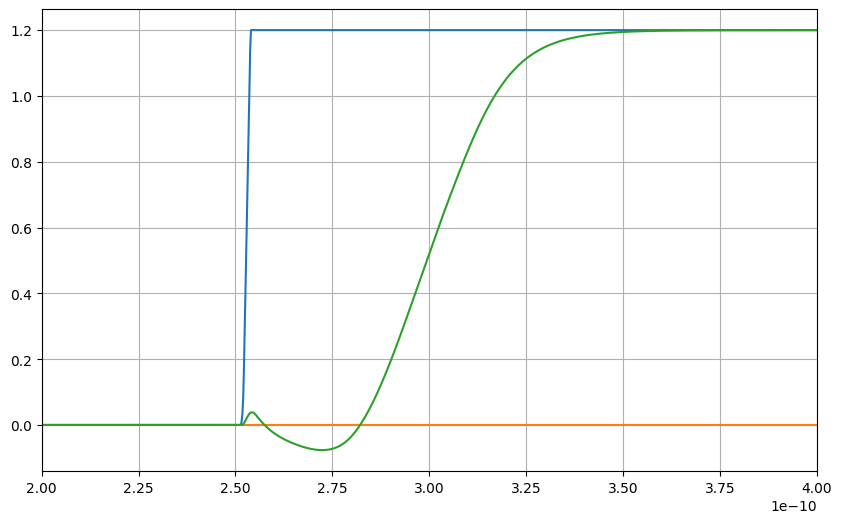

In [5]:
results = plt.figure(figsize=[10,6])
axes_results = results.add_subplot(1,1,1)
axes_results.plot(np.arange(0,SIM_TIME,SIM_STEP),resultados['v(vs4)'])
axes_results.plot(np.arange(0,SIM_TIME,SIM_STEP),resultados['v(vs3)'])
axes_results.plot(np.arange(0,SIM_TIME,SIM_STEP),resultados['v(vo_s3t)'])
axes_results.grid()
#axes_results.set_xticks(np.arange(0,1200,100))
#axes_results.set_xticklabels(np.arange(0,12,1)/10)
axes_results.set_xlim([2e-10,4e-10])

## Comparación entre todas las subidas del análisis de DC

Acá voy a plotear todas las salidas de simulación en un solo plot para compararlas.

In [6]:
### Lectura de todos los archivos
## tran00to01
variables = ['v(vo_s3t)','v(vs3)','v(vs4)']
tran00to01 = readRaw('tran00to01.raw',variables)
## tran00to10
variables = ['v(vo_s2t)','v(vo_s3t)','v(vs3)','v(vs4)']
tran00to10 = readRaw('tran00to10.raw',variables)
## tran00to11
variables = ['v(vo_s1t)','v(vo_s2t)','v(vo_s3t)','v(vs3)','v(vs4)']
tran00to11 = readRaw('tran00to11.raw',variables)
## tran01to10
variables = ['v(vo_s2t)','v(vs3)','v(vs4)']
tran01to10 = readRaw('tran01to10.raw',variables)
## tran01to11
variables = ['v(vo_s1t)','v(vo_s2t)','v(vs3)','v(vs4)']
tran01to11 = readRaw('tran01to11.raw',variables)
## tran10to11
variables = ['v(vo_s1t)','v(vs3)','v(vs4)']
tran10to11 = readRaw('tran10to11.raw',variables)

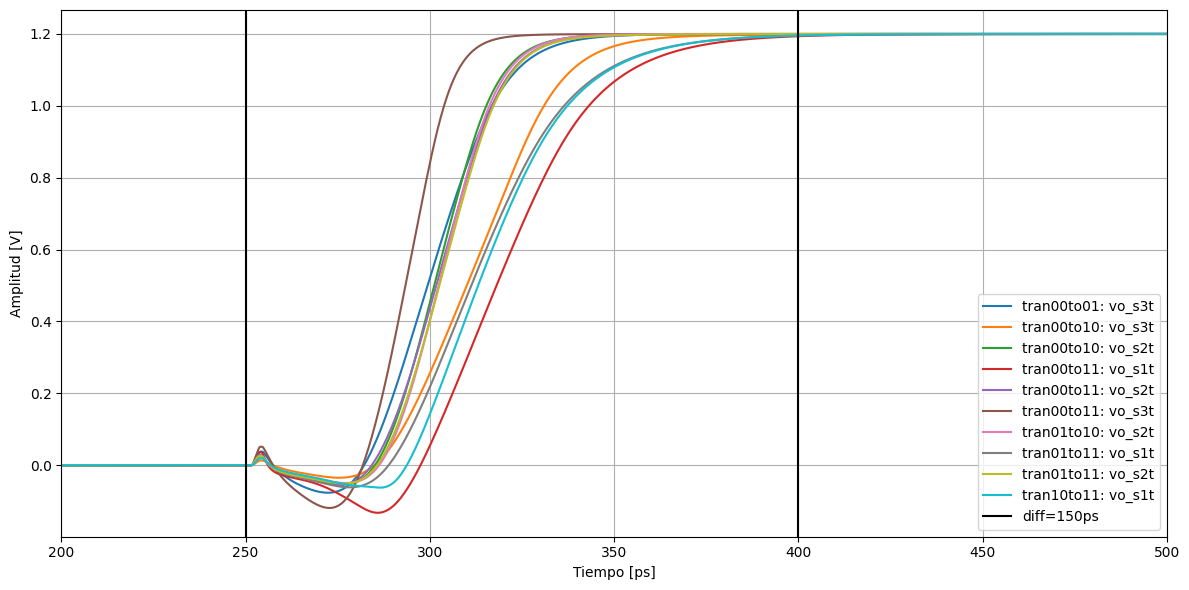

In [7]:
fig_comp = plt.figure(figsize=[12,6])
comp = fig_comp.add_subplot(1,1,1)
comp.plot(np.arange(0,SIM_TIME,SIM_STEP), tran00to01['v(vo_s3t)'], label='tran00to01: vo_s3t')
comp.plot(np.arange(0,SIM_TIME,SIM_STEP), tran00to10['v(vo_s3t)'], label='tran00to10: vo_s3t')
comp.plot(np.arange(0,SIM_TIME,SIM_STEP), tran00to10['v(vo_s2t)'], label='tran00to10: vo_s2t')
comp.plot(np.arange(0,SIM_TIME,SIM_STEP), tran00to11['v(vo_s1t)'], label='tran00to11: vo_s1t')
comp.plot(np.arange(0,SIM_TIME,SIM_STEP), tran00to11['v(vo_s2t)'], label='tran00to11: vo_s2t')
comp.plot(np.arange(0,SIM_TIME,SIM_STEP), tran00to11['v(vo_s3t)'], label='tran00to11: vo_s3t')
comp.plot(np.arange(0,SIM_TIME,SIM_STEP), tran01to10['v(vo_s2t)'], label='tran01to10: vo_s2t')
comp.plot(np.arange(0,SIM_TIME,SIM_STEP), tran01to11['v(vo_s1t)'], label='tran01to11: vo_s1t')
comp.plot(np.arange(0,SIM_TIME,SIM_STEP), tran01to11['v(vo_s2t)'], label='tran01to11: vo_s2t')
comp.plot(np.arange(0,SIM_TIME,SIM_STEP), tran10to11['v(vo_s1t)'], label='tran10to11: vo_s1t')
comp.axvline(250e-12,color='k')
comp.axvline(400e-12,color='k', label='diff=150ps')


comp.grid()
comp.legend()
comp.set_xticks(np.arange(0,752.8e-12,50e-12))
comp.set_xticklabels(np.int16(np.arange(0,752.8,50)))
comp.set_xlabel('Tiempo [ps]')
comp.set_ylabel('Amplitud [V]')
comp.set_xlim([2e-10,5e-10])

#fig_comp.suptitle('Comparación entre las diferentes simulaciones')

fig_comp.tight_layout()